# ICS 235
Name: Zian Zeng

# Predicting the musical genre

## About the data

In this project, we will analyze a dataset to predict the musical genre of popular songs based on the songs characteristics. The dataset was cleaned and filtered for our purpose. As usual, you have a data table with samples as rows and features as columns, with one entry per song.
 
The features are:

| Column range | Feature label | Data type | Description                       |
|--------------|---------------|-----------|-----------------------------------|
|      0       | artist        | string    | Name of the singer/band           |
|      1       | track         | string    | Song title                        |
|      2       | duration      | float     | Duration of the song in minutes   |
|      3       | popularity    | integer   | Song popularity between 1 and 100 |
|     4-15     | ...           | float     | Characteristics of the song       |
|      16      |  genre        | string    | Musical genre of the song         |

A detailed description of the features is available [here](https://developer.spotify.com/documentation/web-api/reference/#objects-index).

## Loading the data

We first need to load the dataset.

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

songs = pd.read_csv("data/songs.csv")
songs.head()

,artist,track,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,Boston,Hitch a Ride,4.20,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.00401,0.101,0.5690,116.454,4,rock
1,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,3.83,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.01610,0.172,0.0918,199.060,4,rock
2,Professional Murder Music,Slow,3.96,29.0,0.431,0.776,10.0,-5.403,1,0.0527,0.000022,0.00130,0.179,0.3180,120.857,4,metal
3,Mohammed Rafi,Meri Dosti Mera Pyar,4.33,11.0,0.491,0.563,7.0,-8.588,0,0.0331,0.957000,0.00230,0.263,0.8430,95.558,4,bollywood
4,"Harald Lassen, Bram de Looze",How it feels pt. 2,4.44,34.0,0.462,0.374,11.0,-12.069,0,0.0331,0.949000,0.92900,0.131,0.1740,122.939,3,instrumental


## Part 1: Preparing the data for analysis

In [8]:


# Convert the artist column to an array (separated by commas for multiple artists in one cell) and get the length of the array (# of artist)

artists_per_track = songs["artist"].to_numpy()
artists_per_track = artists_per_track.astype(str)
artists = np.char.split(artists_per_track, sep=",")

count = 0
for artist in artists:
    count += len(artist)

print("The number of artists is " + str(count))
print("The number of songs is " + str(songs.shape[0]) + "\n")


# Get the types of musical genre
genre_types = songs["genre"].unique()
print(genre_types)

# Get num of entries for musical genre
genre_types_list = songs["genre"].tolist()

num_rock = genre_types_list.count('rock')
num_bol = genre_types_list.count('bollywood')
num_ins = genre_types_list.count('instrumental')
num_pop = genre_types_list.count('pop')
num_hip = genre_types_list.count('hiphop')

print("The number of entries for rock is " + str(num_rock))
print("The number of entries for bollywood is " + str(num_bol))
print("The number of entries for instrumental is " + str(num_ins))
print("The number of entries for pop is " + str(num_pop))
print("The number of entries for hiphop is " + str(num_hip))

The number of artists is 7715
The number of songs is 7247

['rock' 'metal' 'bollywood' 'instrumental' 'pop' 'hiphop']
The number of entries for rock is 3374
The number of entries for bollywood is 270
The number of entries for instrumental is 464
The number of entries for pop is 1099
The number of entries for hiphop is 517


> 2. Now let's chose the features we want for our problem.
    1. Drop the artist and track name, store the target (musical genre) in a new variable `y` and the remaining features in the variable `X`. 

In [9]:
# Your code (2.B)
X = songs.drop(columns=["genre","artist","track"])
y = songs["genre"]


> 3. Split the data in training and testing. Using the scikit-learn library, split the data into 80% training and 20% testing. In order to make the results consistent for everyone, use a random state of 13.

In [10]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)


>4. Normalize the features between 0 and 1.

In [11]:


scaler = Normalizer(norm="l1")
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Part 2: Prediction with an SVM classifier 

> 1. Fit a linear SVM classifier predicting the genre. Compute the accuracy and the average precision score weighted by the class support for both the training and test set. 

In [12]:


#encode catagorical y-val to num for computing score 


linear_SVM = SVC(kernel='linear')
linear_SVM.fit(X_train_scaled, y_train)

y_pred = linear_SVM.predict(X_test_scaled)
y_test_numpy = y_test.to_numpy()

#tranform for encoding
y_pred = y_pred.reshape(-1, 1)
y_test_numpy = y_test_numpy.reshape(-1, 1)

enc = OneHotEncoder(handle_unknown='ignore')

y_pred = enc.fit_transform(y_pred).toarray()
y_test_numpy =  enc.fit_transform(y_test_numpy).toarray()

print(enc.get_feature_names())
print(f"Train accuracy: {linear_SVM.score(X_train_scaled, y_train):.3f}")
print(f"Test accuracy: {linear_SVM.score(X_test_scaled, y_test):.3f}")
print(f"Test average precision score : {average_precision_score(y_test_numpy, y_pred):.3f}")


['x0_bollywood' 'x0_hiphop' 'x0_instrumental' 'x0_metal' 'x0_pop'
 'x0_rock']
Train accuracy: 0.480
Test accuracy: 0.484
Test average precision score : 0.049


> 2. 1. We are now looking for the optimal parameters. Optimize the hyperparameters `C`, `gamma` and the `kernel` using a randomized search approach with 3-fold cross-validation. Use the following ranges for the search:
    - `C: [1, 50] with a step of 5`
    - `gamma: [0.01, 0.5] with a step of 0.1`
    - `kernel: "linear", "poly" or "rbf"` <br/>
Run the optimization for 40 iteration and use a random state of 13. 
   

In [13]:


distributions = dict(C = np.arange(1, 50, 5),
                     gamma = np.arange(0.01, 0.5, 0.1),
                     kernel = ["linear", "poly", "rbf"])

SVM = SVC()
random_search = RandomizedSearchCV(SVM, distributions, n_iter=40, scoring='accuracy', n_jobs=-1, cv=3, random_state=13, return_train_score=True)
random_search.fit(X_train_scaled, y_train)

y_pred = random_search.predict(X_test_scaled)
y_pred = y_pred.reshape(-1, 1)
y_pred = enc.fit_transform(y_pred).toarray()

print(enc.get_feature_names())
print("Best train accuracy:{:.3f}".format(random_search.best_score_))
print("Best parameters: ", random_search.best_params_)
print("Best test accuracy:{:.3f}".format(random_search.score(X_test_scaled, y_test)))
print(f"Test average precision score : {average_precision_score(y_test_numpy, y_pred):.3f}")

['x0_bollywood' 'x0_instrumental' 'x0_rock']
Best train accuracy:0.505
Best parameters:  {'kernel': 'linear', 'gamma': 0.01, 'C': 46}
Best test accuracy:0.505
Test average precision score : 0.092


> 3. 1. Compute the confusion matrix for the best model. Normalize the rows to make it sum to 1. 
  2. Display the normalized confusion matrix as a heatmap. 
  3. Annotate the rows and columns with pandas. Plot the heatmap with the `seaborn.heatmap()` function from the seaborn library to display the label names. 

<ipython-input-14-6bccd3004bec>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= plt.subplot()


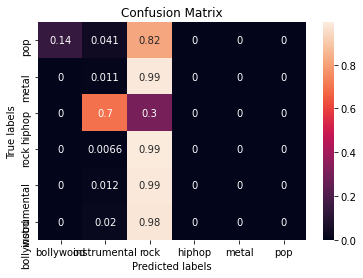

In [14]:
# Your code
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_m = confusion_matrix(y_test_numpy.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
sns.heatmap(conf_m, annot=True)
ax= plt.subplot()

# labels, title and ticks

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['bollywood', 'instrumental', 'rock','hiphop', 'metal', 'pop']); ax.yaxis.set_ticklabels([ 'pop', 'metal','hiphop', 'rock', 'instrumental', 'bollywood']);